In [1]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad
from PIL import Image
modes = [AES.MODE_ECB, AES.MODE_CBC, AES.MODE_OFB, AES.MODE_CFB, AES.MODE_CTR]
mode_names = {AES.MODE_ECB: 'ECB', AES.MODE_CBC: 'CBC', AES.MODE_OFB: 'OFB', AES.MODE_CFB: 'CFB', AES.MODE_CTR: 'CTR'}
files = ['maly_pingwinek.png', 'sredni_pingwinek.png', 'duzy_pingwinek.png']
key = get_random_bytes(16)

In [2]:
def byte_xor(bytes1: bytes, bytes2: bytes):
    return bytes(b1 ^ b2 for b1, b2 in zip(bytes1, bytes2))

In [18]:
for mode in modes:
    cipher = AES.new(key=key, mode=mode)
    for file in files:
        img = Image.open(file)
        byte_img = img.tobytes()
        byte_img = pad(byte_img, AES.block_size)
        en_bytes = cipher.encrypt(byte_img)
        en_png = Image.frombytes(img.mode, img.size, en_bytes)
        en_png.save('pingwiny/normal/{}_{}'.format(mode_names[mode], file), 'PNG')

C:\Users\kubag\AppData\Local\Temp\ipykernel_14060\542991330.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_en.fillna(0)
C:\Users\kubag\AppData\Local\Temp\ipykernel_14060\542991330.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_de.fillna(0)


<Axes: >

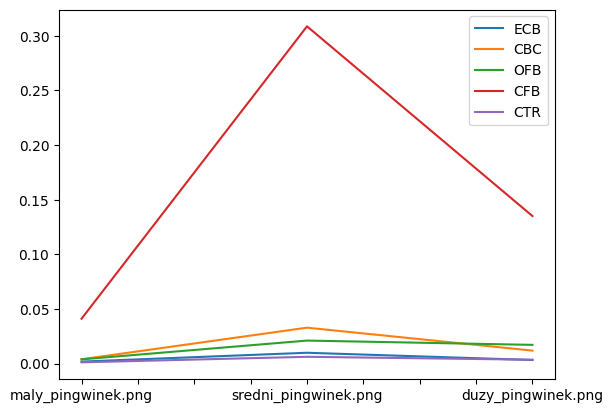

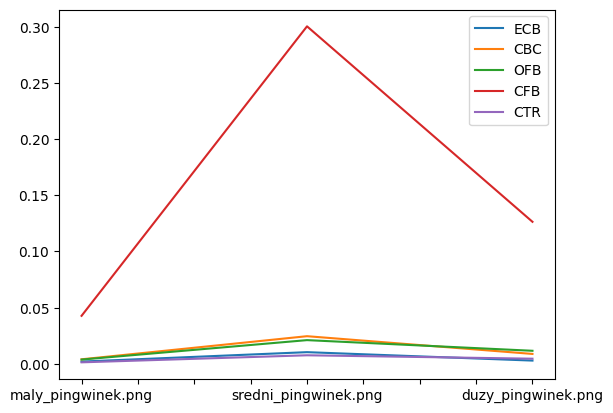

In [4]:
import pandas as pd
import time

files = ['maly_pingwinek.png', 'sredni_pingwinek.png', 'duzy_pingwinek.png']
algos = [mode_names[mode] for mode in modes]
df_en = pd.DataFrame(index=files, columns=algos)
df_en.fillna(0)
df_de = pd.DataFrame(index=files, columns=algos)
df_de.fillna(0)

for mode in modes:
    cipher = AES.new(key=key, mode=mode)
    cipher_de = AES.new(key=key, mode=mode)
    for file in files:
        with open(file, 'rb') as f:
            img = Image.open(file)
            byte_img = img.tobytes()
            byte_img = pad(byte_img, AES.block_size)
            t0_en = time.perf_counter()
            en_bytes = cipher.encrypt(byte_img)
            t1_en = time.perf_counter()
            
            t0_de = time.perf_counter()
            de_bytes = cipher_de.decrypt(en_bytes)
            t1_de = time.perf_counter()
            
            df_en.at[file, mode_names[mode]] = t1_en-t0_en
            df_de.at[file, mode_names[mode]] = t1_de-t0_de
   
df_en.plot()
df_de.plot()

In [3]:
for mode in modes:
    cipher = AES.new(key=key, mode=mode)
    err_cipher = None
    if mode == AES.MODE_ECB:
        err_cipher = AES.new(key=key, mode=mode)
    elif mode == AES.MODE_CTR:
        err_cipher = AES.new(key=key, mode=mode, nonce=cipher.nonce)
    else:
        err_cipher = AES.new(key=key, mode=mode, iv=cipher.iv)
    for file in files:
        img = Image.open(file)
        byte_img = img.tobytes()
        byte_img = pad(byte_img, AES.block_size)
        en_bytes = cipher.encrypt(byte_img)
        en_bytes_arr = bytearray(en_bytes)
        half_len = len(en_bytes) // 2
        en_bytes_arr[half_len] = 1 ^ en_bytes_arr[half_len]
        err_bytes = bytes(en_bytes_arr)
        de_bytes = err_cipher.decrypt(err_bytes)
        de_png = Image.frombytes(img.mode, img.size, de_bytes)
        de_png.save('pingwiny/file_error/file_error_{}_{}'.format(mode_names[mode], file), 'PNG')

In [4]:
def print_bytes(to_print: bytes):
    for i in range(0, len(to_print), AES.block_size):
        for j in range(AES.block_size):
            print(':{:02x}'.format(to_print[i + j]), end='')
        print(':BLOCK', end='')
    print('')

In [11]:
byte_img = get_random_bytes(100)
byte_img = pad(byte_img, AES.block_size)
block_tmp = 0
print('ORG')
print_bytes(byte_img)

for mode in modes:
    cipher = AES.new(key=key, mode=mode)
    err_cipher = None
    if mode == AES.MODE_ECB:
        err_cipher = AES.new(key=key, mode=mode)
    elif mode == AES.MODE_CTR:
        err_cipher = AES.new(key=key, mode=mode, nonce=cipher.nonce)
    else:
        err_cipher = AES.new(key=key, mode=mode, iv=cipher.iv)
    print(mode_names[mode])
    en_bytes = cipher.encrypt(byte_img)
    # print_bytes(en_bytes)
    
    en_bytes_arr = bytearray(en_bytes)
    half_len = len(en_bytes) // 2
    en_bytes_arr[half_len] = 100 ^ en_bytes_arr[half_len]
    
    err_bytes = bytes(en_bytes_arr)
    # print_bytes(err_bytes)
    de_bytes = err_cipher.decrypt(err_bytes)
    print_bytes(de_bytes)

ORG
:a7:1a:bb:00:66:b5:1b:25:7f:a3:77:99:16:7f:6f:69:BLOCK:cf:40:ff:a3:60:2f:eb:43:95:a7:6b:3b:7b:13:1a:fd:BLOCK:50:f0:e9:f8:dc:08:73:78:dd:fc:63:61:30:bc:85:fe:BLOCK:71:c7:30:77:99:70:00:2c:32:57:bf:bb:1e:a8:21:21:BLOCK:92:ac:c1:44:b4:46:ef:62:c3:af:a2:fe:cc:b8:eb:7a:BLOCK:89:a4:d8:77:9f:75:4e:de:6f:f6:3f:5d:4d:04:e8:15:BLOCK:07:db:3f:54:0c:0c:0c:0c:0c:0c:0c:0c:0c:0c:0c:0c:BLOCK
ECB
:a7:1a:bb:00:66:b5:1b:25:7f:a3:77:99:16:7f:6f:69:BLOCK:cf:40:ff:a3:60:2f:eb:43:95:a7:6b:3b:7b:13:1a:fd:BLOCK:50:f0:e9:f8:dc:08:73:78:dd:fc:63:61:30:bc:85:fe:BLOCK:9a:98:d8:40:82:ea:9c:8b:bc:49:92:66:20:9b:93:e4:BLOCK:92:ac:c1:44:b4:46:ef:62:c3:af:a2:fe:cc:b8:eb:7a:BLOCK:89:a4:d8:77:9f:75:4e:de:6f:f6:3f:5d:4d:04:e8:15:BLOCK:07:db:3f:54:0c:0c:0c:0c:0c:0c:0c:0c:0c:0c:0c:0c:BLOCK
CBC
:a7:1a:bb:00:66:b5:1b:25:7f:a3:77:99:16:7f:6f:69:BLOCK:cf:40:ff:a3:60:2f:eb:43:95:a7:6b:3b:7b:13:1a:fd:BLOCK:50:f0:e9:f8:dc:08:73:78:dd:fc:63:61:30:bc:85:fe:BLOCK:50:67:54:3a:8a:47:0a:57:1d:d0:ed:d5:e5:a7:04:ef:BLOCK:92:ac:c1:44:b

In [8]:
err_key = byte_xor(key, (bytes.fromhex('0001') + b'\0' * 14))
print(key, err_key)
for mode in modes:
    cipher = AES.new(key=key, mode=mode)
    err_cipher = None
    if mode == AES.MODE_ECB:
        err_cipher = AES.new(key=err_key, mode=mode)
    elif mode == AES.MODE_CTR:
        err_cipher = AES.new(key=err_key, mode=mode, nonce=cipher.nonce)
    else:
        err_cipher = AES.new(key=err_key, mode=mode, iv=cipher.iv)
    for file in files:
        img = Image.open(file)
        byte_img = img.tobytes()
        byte_img = pad(byte_img, AES.block_size)
        en_bytes = cipher.encrypt(byte_img)
        de_bytes = err_cipher.decrypt(en_bytes)
        de_png = Image.frombytes(img.mode, img.size, de_bytes)
        de_png.save('pingwiny/key_error/key_error_{}_{}'.format(mode_names[mode], file), 'PNG')

b'!\xc1O\x90\xe72\xca\x10\x17\xb2\xd8u\xc5\xc6NV' b'!\xc0O\x90\xe72\xca\x10\x17\xb2\xd8u\xc5\xc6NV'


In [16]:
def cbc_encrypt(data, key, iv):
    cipher = AES.new(key=key, mode=AES.MODE_ECB)
    c_bytes = b''
    prev_block = iv
    
    for i in range(0, len(data), AES.block_size):
        new_block = data[i : i + AES.block_size]
        xor_block = byte_xor(new_block, prev_block)
        en_block = cipher.encrypt(xor_block)
        prev_block = en_block
        c_bytes += en_block
    
    return c_bytes        

def cbc_decrypt(data, key, iv):
    cipher = AES.new(key=key, mode=AES.MODE_ECB)
    c_bytes = b''
    prev_block = iv
    
    for i in range(0, len(data), AES.block_size):
        new_block = data[i : i + AES.block_size]
        de_block = cipher.decrypt(new_block)
        xor_block = byte_xor(de_block, prev_block)
        c_bytes += xor_block
        prev_block = new_block
    
    return c_bytes       

In [17]:
iv = get_random_bytes(AES.block_size)
byte_img = get_random_bytes(10_000)
print(byte_img)
byte_img = pad(byte_img, AES.block_size)
en_bytes = cbc_encrypt(byte_img, key, iv)
print(en_bytes)
de_bytes = cbc_decrypt(en_bytes, key, iv)
print(de_bytes)
print(len(de_bytes))

b'\xbac<\x0ep\xe0KB\xa0\xa2\x85=\xec|\xcdaS\xb4\xcc\xd1\x03\xab\x1d\x84\x1b\x91x\xb6.\xc4\xec\xf0Y\xbc\xc6\xae|H\xe5\xbf\xac1\x943\x0c[\xf1\xbcL\xe1\x15)\xd3\xbbBRu\xda}\xd2GY\x80$,P\xaf\x92k\xcaa5?\\(\xc6K\x12\xd0\x02~\x1c oe\xa4\x7fqW\xb2\xebx\xbd\x80!\xc7\xd1\xddn|Y\xecusF\x18q\t\xe3\xde~\x9e\x03\xb0\xd6K\x92\xd0P\x82\xbb_\xf4\x16\xb8o\xe3\xc5\xec\xac\x88F\xd9\xca\xee!\xd4\x9fV\xb1\xa9\x93Jv1\xb5F\x85\x85\xfb#\x924\xfc*\x1d\xf3\xaecK\xd7* \x1d\x05\xc4\x9a\x08\xc3\x88=\xd6\'\xc3\xaf\x97\xc8\x89\x8b\x9e\xba\xf2\xc7\xf5\xef\xb0E\xbfm"\xef\x12\xbb\x19*TX\x0c\r]\xf8\xa2\x02n\xb9P\xa1\x1c\xd4\xa8<BH\x0c\xe0@\xd5\xa3]\xdd\xa2\xab\x8fJ\x0c\xb0\x19\x1c\x04\xb2\xbf\xe6y@\x81|\x0b\xb9\x15BCl\xc7\xe3n\xe8I\x82\x96\xbe\xf0+,+@\xcc+\x80\xee\xe5>\x13\x1d#\xbe@\xd6cS\xd3\x93S\x92q\x0c\xb6\xbc\xab\x1f\xa3N\x84\xfe \xdcXj\xdd\xd5\xeca\x99e\xb1\xf6\x1c\xf8,u.O|l&\x92?\xfb\xc5\x00R\x08P[U\x949\xf9\xb7N\xfdY\\\x1c\x8eS\xa6#7\xf3\x8f\x1b\xde\x86a\xd7\x075\xe0\x94TlP\\\xb3 \x9e\xb2\xcfX\x8f$)\x08\x9f/\xae